**Objective**
- Perform **Market Basket Analysis (MBA)** to identify **frequent itemsets** and generate **association rules** that describe purchasing patterns
- Provide item recommendations based on user purchase history and encourage upselling of related products

**About the Data:**
The `AllPurchaseData` dataset contains transaction records of all customer grocery purchases. The dataset consists of the following columns:

- **InvoiceNo**: A unique identifier for each transaction.
- **StockCode**: The product code associated with the purchased item.
- **Description**: The name of the product.
- **Quantity**: The number of units purchased for each item in a transaction.

#### Install Libraries

In [1]:
#!pip install mlxtend

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import for Apriori Algorithm and Association Analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


### 1. Reading the Groceries Dataset into DataFrame

Now let's create a `DataFrame` on this `csv` file.

In [2]:
# Read dataset from CSV file
df = pd.read_csv('data/AllPurchaseData.csv')

# Show information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354345 entries, 0 to 354344
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    354345 non-null  int64 
 1   StockCode    354345 non-null  object
 2   Description  354345 non-null  object
 3   Quantity     354345 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 10.8+ MB


### 2. Exploratory Data Analysis

#### Number of unique invoices

In [3]:
# How many unique invoice numbers?
df["InvoiceNo"].nunique()

16649

#### Distribution of Transaction Sizes

Min:  Quantity    1
dtype: int64
Max:  Quantity    80995
dtype: int64


<Axes: >

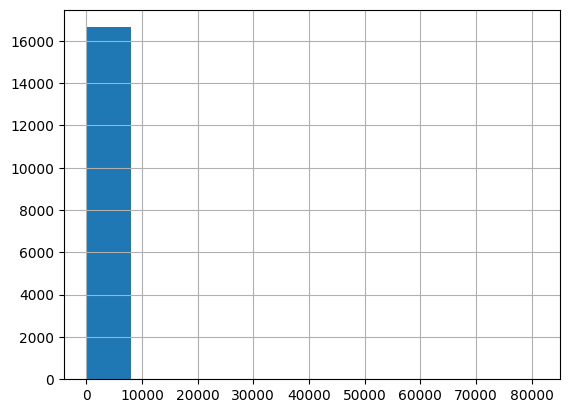

In [4]:
# Show histogram of transaction sizes (i.e. total number of items in each invoice)
txn_sizes = pd.DataFrame(df.groupby('InvoiceNo').sum()['Quantity'])
print("Min: ", txn_sizes.min())
print("Max: ", txn_sizes.max())
# Filter range to 1 - 80995 for min and max quantity of data
txn_sizes['Quantity'].hist(range = (1,80995))

In [5]:
# Groups transaction data by InvoiceNo and Description to aggregate the total quantity of each item purchased per transaction.
txn = df.groupby(['InvoiceNo', 'Description'])["Quantity"].sum()
print(txn)

# Double-check the number of transactions, is it the same as before?
txn.index.get_level_values('InvoiceNo').nunique()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581585     ZINC WILLIE WINKIE  CANDLE STICK       24
581586     DOORMAT RED RETROSPOT                  10
           LARGE CAKE STAND  HANGING STRAWBERY     8
           RED RETROSPOT ROUND CAKE TINS          24
           SET OF 3 HANGING OWLS OLLIE BEAK       24
Name: Quantity, Length: 344362, dtype: int64


16649

### 3. Preparing the Data for Market Basket Analysis

In [6]:
# Transform the data, so that each description becomes a column, and the values in the table represent the quantity
txn_df = txn.unstack(fill_value=0)
txn_df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Binary Encoding (replacing all positives with 1)
txn_df = txn_df.map(lambda x: 0 if x <= 0 else 1)
txn_df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Keep only transactions with 2 or more items
basket_df = txn_df[txn_df.sum(axis=1) >= 2]
basket_df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Performing Market Basket Analysis

In [9]:
# Convert 0's and 1's to boolean values
basket_df = basket_df.astype(bool)

In [10]:
# Generate the frequent itemsets with support >= 0.02
frequent_itemsets = apriori(basket_df, min_support=0.02, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets

,support,itemsets
215,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
94,0.093197,(JUMBO BAG RED RETROSPOT)
174,0.090466,(REGENCY CAKESTAND 3 TIER)
12,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
144,0.082986,(PARTY BUNTING)
...,...,...
22,0.020226,(CARD BILLBOARD FONT)
230,0.020161,(ZINC FOLKART SLEIGH BELLS)
211,0.020161,(VINTAGE DOILY TRAVEL SEWING KIT)
105,0.020031,(KNITTED UNION FLAG HOT WATER BOTTLE)


In [11]:
# Create a new variable 'length' which stores the number of items in each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
215,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER),1
94,0.093197,(JUMBO BAG RED RETROSPOT),1
174,0.090466,(REGENCY CAKESTAND 3 TIER),1
12,0.084417,(ASSORTED COLOUR BIRD ORNAMENT),1
144,0.082986,(PARTY BUNTING),1
...,...,...,...
22,0.020226,(CARD BILLBOARD FONT),1
230,0.020161,(ZINC FOLKART SLEIGH BELLS),1
211,0.020161,(VINTAGE DOILY TRAVEL SEWING KIT),1
105,0.020031,(KNITTED UNION FLAG HOT WATER BOTTLE),1


In [12]:
# Keep only itemsets with at least 2 items
frequent_itemsets[frequent_itemsets['length'] >= 2]

,support,itemsets,length
244,0.032908,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
252,0.031478,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
235,0.030957,"(FRESH AUSTRALIAN GRAPES 100g, CHESTERS FLAMIN...",2
264,0.030632,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",2
275,0.029787,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...",2
240,0.029787,"(GARDENERS KNEELING PAD KEEP CALM , GARDENERS ...",2
232,0.029527,"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",2
251,0.028746,"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA...",2
272,0.028421,"(PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN ...",2
274,0.027836,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...",2


In [13]:
# Count how many itemsets have at least 2 items
frequent_itemsets[frequent_itemsets['length'] >= 2].count()

support     45
itemsets    45
length      45
dtype: int64

In [14]:
# Show association rules with lift >= 10
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=22).sort_values("lift",ascending=False)
assoc_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(FRESH AUSTRALIAN GRAPES 100g, CHESTERS FLAMIN...",(COOKIES AND CREAM DREAM CAKE 200g),0.030957,0.031803,0.022177,0.716387,22.525889,1.0,0.021193,3.413792,0.986135,0.546474,0.707071,0.706864
3,(COOKIES AND CREAM DREAM CAKE 200g),"(FRESH AUSTRALIAN GRAPES 100g, CHESTERS FLAMIN...",0.031803,0.030957,0.022177,0.697342,22.525889,1.0,0.021193,3.201769,0.986996,0.546474,0.687673,0.706864
1,"(CHESTERS FLAMIN' HOT FRIES CHIPS 270g , COOKI...",(FRESH AUSTRALIAN GRAPES 100g),0.024909,0.039802,0.022177,0.890339,22.369051,1.0,0.021186,8.756089,0.979699,0.521407,0.885794,0.723764
2,(FRESH AUSTRALIAN GRAPES 100g),"(CHESTERS FLAMIN' HOT FRIES CHIPS 270g , COOKI...",0.039802,0.024909,0.022177,0.557190,22.369051,1.0,0.021186,2.202051,0.994894,0.521407,0.545878,0.723764


In [15]:
# Show column names
assoc_rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [16]:
# Keep only the columns that we learned in the Analytics Foundation
assoc_rules2 = assoc_rules[['antecedents', 'consequents', 'support', 'confidence', 'consequent support', 'lift']].rename(columns={
    'antecedents': 'LHS',
    'consequents': 'RHS',
    'support': 'Support',
    'confidence': 'Confidence',
    'consequent support': 'Expected Confidence',
    'lift': 'Lift',
})
assoc_rules2

,LHS,RHS,Support,Confidence,Expected Confidence,Lift
0,"(FRESH AUSTRALIAN GRAPES 100g, CHESTERS FLAMIN...",(COOKIES AND CREAM DREAM CAKE 200g),0.022177,0.716387,0.031803,22.525889
3,(COOKIES AND CREAM DREAM CAKE 200g),"(FRESH AUSTRALIAN GRAPES 100g, CHESTERS FLAMIN...",0.022177,0.697342,0.030957,22.525889
1,"(CHESTERS FLAMIN' HOT FRIES CHIPS 270g , COOKI...",(FRESH AUSTRALIAN GRAPES 100g),0.022177,0.890339,0.039802,22.369051
2,(FRESH AUSTRALIAN GRAPES 100g),"(CHESTERS FLAMIN' HOT FRIES CHIPS 270g , COOKI...",0.022177,0.557190,0.024909,22.369051


#### Visualising the Association Rules (using Lift)

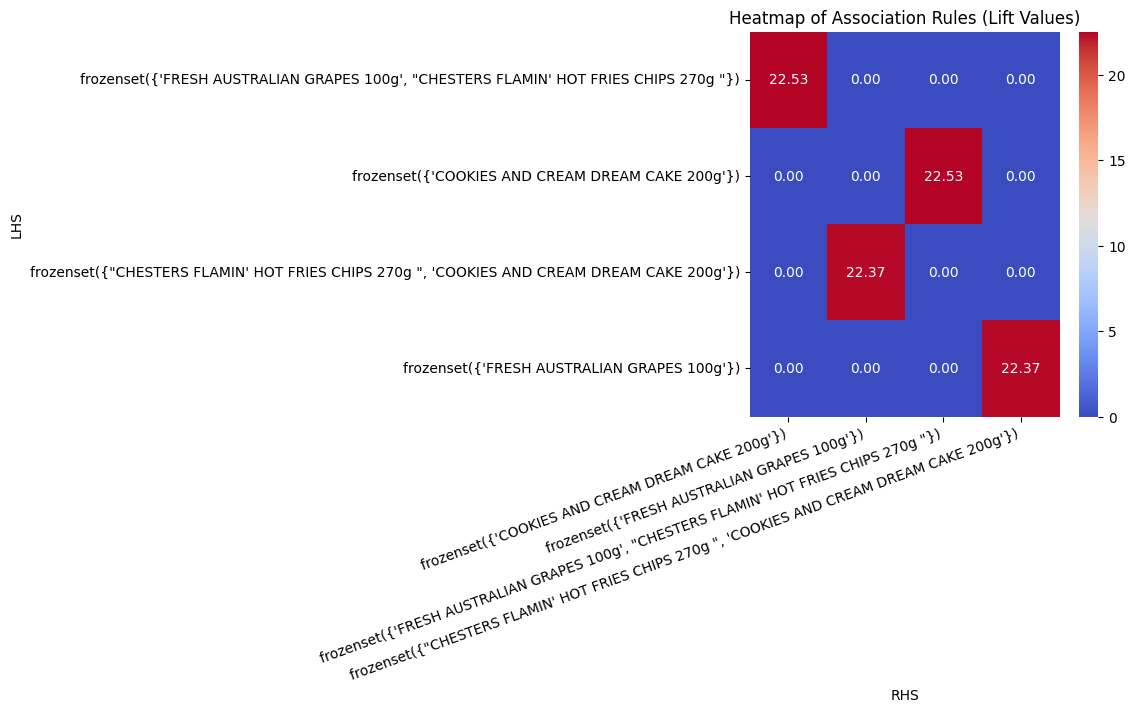

In [18]:
# Pivot table for heatmap, where the rows are "LHS" of rules, columns are "RHS" of rules,
# and values (colors) represent lift values
rules_pivot = assoc_rules2.pivot(index="LHS", columns="RHS", values="Lift").fillna(0)

# Set size of figure
plt.figure(figsize=(5, 5))

# Generate heatmap
ax = sns.heatmap(rules_pivot, annot=True, cmap="coolwarm", fmt=".2f")

# Rotate x-axis labels at 45 degrees, align right
plt.xticks(rotation=20, ha="right")  

# Set title and show heatmap
plt.title("Heatmap of Association Rules (Lift Values)")
plt.show()